In [7]:
import numpy as np
import mbo_utilities as mbo
import suite2p
import matplotlib.pyplot as plt

In [14]:
results = r"/home/flynn/lbm_data/assembled/roi2/plane7/F.npy"
f = np.load(results)

In [15]:
f.shape

(113, 220)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
from pathlib import Path

# Simulate or load example data
np.random.seed(0)
f = np.random.normal(loc=100, scale=10, size=(113, 220)) + np.random.normal(loc=0, scale=30, size=(113, 220)) * (np.random.rand(113, 220) > 0.95)

# Compute DFF using various methods
def compute_dff(trace, f0):
    return (trace - f0) / f0

# Median
f0_median = np.median(f, axis=1, keepdims=True)
dff_median = compute_dff(f, f0_median)

# Percentile
f0_percentile = np.percentile(f, 20, axis=1, keepdims=True)
dff_percentile = compute_dff(f, f0_percentile)

# Moving Percentile
def moving_percentile(trace, window_size=60, percentile=20):
    return generic_filter(trace, function=lambda x: np.percentile(x, percentile), size=window_size)

f0_moving = np.array([moving_percentile(row) for row in f])
dff_moving = compute_dff(f, f0_moving)

# Plotting setup
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
time = np.arange(f.shape[1])

axes[0].plot(time, dff_median[0], label="Median", color='cyan')
axes[1].plot(time, dff_percentile[0], label="20th Percentile", color='magenta')
axes[2].plot(time, dff_moving[0], label="Moving 20th Percentile", color='orange')

for ax in axes:
    ax.legend(loc="upper right")
    ax.set_facecolor("black")
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')

fig.suptitle("ΔF/F Calculation Methods", color='white')
fig.tight_layout()
fig.subplots_adjust(top=0.9)

output_path = Path("./res/fig.png")
output_path.parent.mkdir(exist_ok=True)
fig.savefig(output_path, transparent=True, dpi=300)
plt.close(fig)

In [11]:
print('hello')

hello


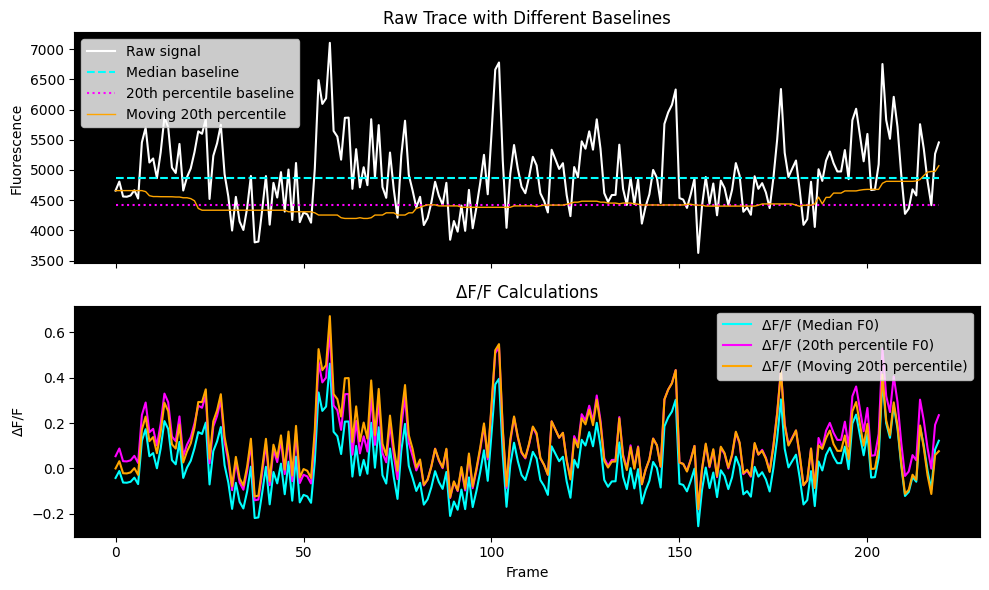

In [37]:
window_size = 60

trace = f[0]
time = np.arange(len(trace))

# Median F0
f0_median = np.median(trace)
dff_median = (trace - f0_median) / f0_median

# 20th percentile F0
f0_pct = np.percentile(trace, 20)
dff_pct = (trace - f0_pct) / f0_pct

# Moving 20th percentile
f0_moving = generic_filter(trace, lambda x: np.percentile(x, 20), size=window_size, mode='nearest')
dff_moving = (trace - f0_moving) / f0_moving

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, facecolor='none')

# Raw trace and baselines
ax[0].plot(time, trace, label="Raw signal", color="white", lw=1.5)
ax[0].hlines(f0_median, time[0], time[-1], label="Median baseline", color="cyan", ls="--")
ax[0].hlines(f0_pct, time[0], time[-1], label="20th percentile baseline", color="magenta", ls=":")
ax[0].plot(time, f0_moving, label="Moving 20th percentile", color="orange", lw=1)
ax[0].legend()
ax[0].set_ylabel("Fluorescence")
ax[0].set_title("Raw Trace with Different Baselines")
ax[0].set_facecolor("black")

# DFF results
ax[1].plot(time, dff_median, label="ΔF/F (Median F0)", color="cyan")
ax[1].plot(time, dff_pct, label="ΔF/F (20th percentile F0)", color="magenta")
ax[1].plot(time, dff_moving, label="ΔF/F (Moving 20th percentile)", color="orange")
ax[1].legend()
ax[1].set_ylabel("ΔF/F")
ax[1].set_xlabel("Frame")
ax[1].set_title("ΔF/F Calculations")
ax[1].set_facecolor("black")

fig.tight_layout()
fig.patch.set_alpha(0)

output_path = Path("./res/fig.png")
output_path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(output_path, dpi=300, transparent=True)